<a href="https://colab.research.google.com/github/Sid47wit/Workspace_Utilization_Revenue_Optimization_Dashboard/blob/main/Workspace%20Utilization%20%26%20Revenue%20Optimization%20Dashboard%20(Updated).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install ipython-sql

In [ ]:
%load_ext sql

In [ ]:
%%sql sqlite://
CREATE DATABASE wework_bii;
USE wework_bi1;

(sqlite3.OperationalError) near "DATABASE": syntax error
[SQL: CREATE DATABASE wework_bii;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


# Task
Analyze workspace utilization and revenue from the `wework_workspace_data.csv` file by loading it into an SQL table, calculating key utilization and revenue metrics, and then generating a dashboard with visualizations to present these insights, including legends for all plots.

## Load Workspace Data

### Subtask:
Load the 'wework_workspace_data.csv' file into a pandas DataFrame for initial inspection and preparation.


In [ ]:
import pandas as pd
df_wework = pd.read_csv('/content/wework_workspace_data.csv')
df_wework.head()

,Location,Building,Desk_Type,Total_Seats,Occupied_Seats,Monthly_Revenue,Membership_Type,Join_Date,Exit_Date
0,Bengaluru,Hub B,Dedicated Desk,151,33,531729,Monthly,2024-09-06,NaN
1,Bengaluru,Hub A,Private Office,67,23,460368,Annual,2025-02-20,NaN
2,Bengaluru,Hub C,Private Office,117,69,1600041,Monthly,2024-08-26,NaN
3,Bengaluru,Hub C,Private Office,148,96,2186784,Annual,2025-02-11,NaN
4,Bengaluru,Hub C,Dedicated Desk,64,59,1045775,Monthly,2025-10-06,NaN


## Create SQL Table


In [ ]:
%%sql sqlite://

# Use the ipython-sql --persist magic to transfer the pandas DataFrame 'df_wework' to an SQL table.
# This creates a table named 'df_wework' in the connected SQLite database.
%sql --persist df_wework

# Rename the table from 'df_wework' to 'wework_data' and verify the data
%%sql
ALTER TABLE df_wework RENAME TO wework_data;
SELECT * FROM wework_data LIMIT 5;

(sqlite3.OperationalError) unrecognized token: "#"
[SQL: # Use the ipython-sql --persist magic to transfer the pandas DataFrame 'df_wework' to an SQL table.
# This creates a table named 'df_wework' in the connected SQLite database.
%sql --persist df_wework

# Rename the table from 'df_wework' to 'wework_data' and verify the data
%%sql
ALTER TABLE df_wework RENAME TO wework_data;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [ ]:
import sqlite3

%sql sqlite://

# Use the ipython-sql --persist magic to transfer the pandas DataFrame 'df_wework' to an SQL table.
# This creates a table named 'df_wework' in the connected SQLite database.
%sql --persist df_wework

print("DataFrame 'df_wework' successfully persisted to a temporary SQL table named 'df_wework'.")

 * sqlite://
DataFrame 'df_wework' successfully persisted to a temporary SQL table named 'df_wework'.


In [ ]:
%%sql
ALTER TABLE df_wework RENAME TO wework_data;

 * sqlite://
(sqlite3.OperationalError) no such table: df_wework
[SQL: ALTER TABLE df_wework RENAME TO wework_data;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [ ]:
import sqlite3
import pandas as pd

# Establish a direct connection to an in-memory SQLite database
# This ensures we control the database interaction directly without ipython-sql's display issues.
conn = sqlite3.connect(':memory:')

# Transfer the data from df_wework to an SQL table named 'wework_data'
# Using the direct sqlite3 connection, replacing if it exists.
df_wework.to_sql('wework_data', con=conn, if_exists='replace', index=False)

# Use pandas.read_sql_query to directly fetch data into a DataFrame, bypassing ipython-sql's rendering.
wework_data_preview_df = pd.read_sql_query("SELECT * FROM wework_data LIMIT 5;", conn)

print("Successfully retrieved first 5 rows of 'wework_data' into 'wework_data_preview_df' using direct sqlite3 connection:")
display(wework_data_preview_df)

# Close the connection when done
conn.close()

Successfully retrieved first 5 rows of 'wework_data' into 'wework_data_preview_df' using direct sqlite3 connection:


,Location,Building,Desk_Type,Total_Seats,Occupied_Seats,Monthly_Revenue,Membership_Type,Join_Date,Exit_Date
0,Bengaluru,Hub B,Dedicated Desk,151,33,531729,Monthly,2024-09-06,None
1,Bengaluru,Hub A,Private Office,67,23,460368,Annual,2025-02-20,None
2,Bengaluru,Hub C,Private Office,117,69,1600041,Monthly,2024-08-26,None
3,Bengaluru,Hub C,Private Office,148,96,2186784,Annual,2025-02-11,None
4,Bengaluru,Hub C,Dedicated Desk,64,59,1045775,Monthly,2025-10-06,None


## Calculate Workspace Utilization Metrics


In [ ]:
import sqlite3
import pandas as pd

# Establish a direct connection to an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Transfer the data from df_wework to an SQL table named 'wework_data'
df_wework.to_sql('wework_data', con=conn, if_exists='replace', index=False)

print("DataFrame 'df_wework' successfully transferred to SQL table 'wework_data'.")

# 1. Calculate overall average workspace utilization
sql_overall_avg_util = "SELECT CAST(SUM(Occupied_Seats) AS REAL) / SUM(Total_Seats) FROM wework_data;"
df_overall_avg_util = pd.read_sql_query(sql_overall_avg_util, conn)
print("\nOverall Average Utilization:")
display(df_overall_avg_util)

# 2. Calculate average workspace utilization by Location, Building, and Desk_Type
sql_avg_util_by_segment = """
SELECT
    Location,
    Building,
    Desk_Type,
    CAST(SUM(Occupied_Seats) AS REAL) / SUM(Total_Seats) AS Avg_Utilization
FROM
    wework_data
GROUP BY
    Location, Building, Desk_Type
ORDER BY
    Location, Building, Desk_Type;
"""
df_avg_util_by_segment = pd.read_sql_query(sql_avg_util_by_segment, conn)
print("\nAverage Utilization by Location, Building, and Desk Type:")
display(df_avg_util_by_segment)

# 3. Calculate overall peak workspace utilization
sql_overall_peak_util = "SELECT MAX(CAST(Occupied_Seats AS REAL) / Total_Seats) FROM wework_data;"
df_overall_peak_util = pd.read_sql_query(sql_overall_peak_util, conn)
print("\nOverall Peak Utilization:")
display(df_overall_peak_util)

# 4. Calculate peak workspace utilization for each unique combination of Location, Building, and Desk_Type
sql_peak_util_by_segment = """
SELECT
    Location,
    Building,
    Desk_Type,
    MAX(CAST(Occupied_Seats AS REAL) / Total_Seats) AS Peak_Utilization
FROM
    wework_data
GROUP BY
    Location, Building, Desk_Type
ORDER BY
    Location, Building, Desk_Type;
"""
df_peak_util_by_segment = pd.read_sql_query(sql_peak_util_by_segment, conn)
print("\nPeak Utilization by Location, Building, and Desk Type:")
display(df_peak_util_by_segment)

# 5. Calculate monthly average utilization trends
sql_monthly_util_trends = """
SELECT
    STRFTIME('%Y-%m', Join_Date) AS Month_Year,
    CAST(SUM(Occupied_Seats) AS REAL) / SUM(Total_Seats) AS Monthly_Avg_Utilization
FROM
    wework_data
GROUP BY
    Month_Year
ORDER BY
    Month_Year;
"""
df_monthly_util_trends = pd.read_sql_query(sql_monthly_util_trends, conn)
print("\nMonthly Average Utilization Trends:")
display(df_monthly_util_trends)

# Close the connection when done
conn.close()

DataFrame 'df_wework' successfully transferred to SQL table 'wework_data'.

Overall Average Utilization:


,CAST(SUM(Occupied_Seats) AS REAL) / SUM(Total_Seats)
0,0.557542



Average Utilization by Location, Building, and Desk Type:


,Location,Building,Desk_Type,Avg_Utilization
0,Bengaluru,Hub A,Dedicated Desk,0.448845
1,Bengaluru,Hub A,Hot Desk,0.608731
2,Bengaluru,Hub A,Private Office,0.375740
3,Bengaluru,Hub B,Dedicated Desk,0.546791
4,Bengaluru,Hub B,Hot Desk,0.505400
5,Bengaluru,Hub B,Private Office,0.517903
6,Bengaluru,Hub C,Dedicated Desk,0.671942
7,Bengaluru,Hub C,Hot Desk,0.723145
8,Bengaluru,Hub C,Private Office,0.528258
9,Delhi,Hub A,Dedicated Desk,0.430672



Overall Peak Utilization:


,MAX(CAST(Occupied_Seats AS REAL) / Total_Seats)
0,1.0



Peak Utilization by Location, Building, and Desk Type:


,Location,Building,Desk_Type,Peak_Utilization
0,Bengaluru,Hub A,Dedicated Desk,0.796460
1,Bengaluru,Hub A,Hot Desk,0.973333
2,Bengaluru,Hub A,Private Office,0.685393
3,Bengaluru,Hub B,Dedicated Desk,0.928571
4,Bengaluru,Hub B,Hot Desk,0.869347
5,Bengaluru,Hub B,Private Office,0.960784
6,Bengaluru,Hub C,Dedicated Desk,0.976744
7,Bengaluru,Hub C,Hot Desk,0.941176
8,Bengaluru,Hub C,Private Office,0.921569
9,Delhi,Hub A,Dedicated Desk,0.661871



Monthly Average Utilization Trends:


,Month_Year,Monthly_Avg_Utilization
0,2024-08,0.593435
1,2024-09,0.563620
2,2024-10,0.569910
3,2024-11,0.610654
4,2024-12,0.456306
5,2025-01,0.606353
6,2025-02,0.609214
7,2025-03,0.603995
8,2025-04,0.408778
9,2025-05,0.557076


## Calculate Revenue Optimization Metrics

In [ ]:
import sqlite3
import pandas as pd

# Establish a direct connection to an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Transfer the data from df_wework to an SQL table named 'wework_data'
df_wework.to_sql('wework_data', con=conn, if_exists='replace', index=False)

print("DataFrame 'df_wework' successfully transferred to SQL table 'wework_data'.")

# 1. Calculate overall total revenue
sql_overall_total_revenue = "SELECT SUM(Monthly_Revenue) AS Overall_Total_Revenue FROM wework_data;"
df_overall_total_revenue = pd.read_sql_query(sql_overall_total_revenue, conn)
print("\nOverall Total Revenue:")
display(df_overall_total_revenue)

# 2. Calculate overall average revenue per seat
sql_overall_avg_revenue_per_seat = "SELECT CAST(SUM(Monthly_Revenue) AS REAL) / SUM(Total_Seats) AS Overall_Avg_Revenue_Per_Seat FROM wework_data;"
df_overall_avg_revenue_per_seat = pd.read_sql_query(sql_overall_avg_revenue_per_seat, conn)
print("\nOverall Average Revenue Per Seat:")
display(df_overall_avg_revenue_per_seat)

# 3. Calculate average revenue per seat for each Desk_Type
sql_avg_revenue_per_seat_by_desk_type = """
SELECT
    Desk_Type,
    CAST(SUM(Monthly_Revenue) AS REAL) / SUM(Total_Seats) AS Avg_Revenue_Per_Seat
FROM
    wework_data
GROUP BY
    Desk_Type
ORDER BY
    Desk_Type;
"""
df_avg_revenue_per_seat_by_desk_type = pd.read_sql_query(sql_avg_revenue_per_seat_by_desk_type, conn)
print("\nAverage Revenue Per Seat by Desk Type:")
display(df_avg_revenue_per_seat_by_desk_type)

# 4. Calculate total revenue for each unique combination of Location, Building, and Desk_Type
sql_total_revenue_by_segment = """
SELECT
    Location,
    Building,
    Desk_Type,
    SUM(Monthly_Revenue) AS Total_Revenue
FROM
    wework_data
GROUP BY
    Location, Building, Desk_Type
ORDER BY
    Location, Building, Desk_Type;
"""
df_total_revenue_by_segment = pd.read_sql_query(sql_total_revenue_by_segment, conn)
print("\nTotal Revenue by Location, Building, and Desk Type:")
display(df_total_revenue_by_segment)

# Close the connection when done
conn.close()

DataFrame 'df_wework' successfully transferred to SQL table 'wework_data'.

Overall Total Revenue:


,Overall_Total_Revenue
0,270697117



Overall Average Revenue Per Seat:


,Overall_Avg_Revenue_Per_Seat
0,8672.853934



Average Revenue Per Seat by Desk Type:


,Desk_Type,Avg_Revenue_Per_Seat
0,Dedicated Desk,8182.330654
1,Hot Desk,5988.741965
2,Private Office,11759.899205



Total Revenue by Location, Building, and Desk Type:


,Location,Building,Desk_Type,Total_Revenue
0,Bengaluru,Hub A,Dedicated Desk,4146644
1,Bengaluru,Hub A,Hot Desk,6998950
2,Bengaluru,Hub A,Private Office,5248998
3,Bengaluru,Hub B,Dedicated Desk,6347773
4,Bengaluru,Hub B,Hot Desk,4900672
5,Bengaluru,Hub B,Private Office,17360829
6,Bengaluru,Hub C,Dedicated Desk,14458394
7,Bengaluru,Hub C,Hot Desk,6475113
8,Bengaluru,Hub C,Private Office,10109515
9,Delhi,Hub A,Dedicated Desk,2609911


## Analyze and Aggregate Data for Dashboard


In [ ]:
import pandas as pd

# 1. Convert 'Month_Year' to datetime objects in df_monthly_util_trends
df_monthly_util_trends['Month_Year'] = pd.to_datetime(df_monthly_util_trends['Month_Year'])
print("Converted 'Month_Year' column in df_monthly_util_trends to datetime objects.")

# 2. Review the structure and content of the specified DataFrames

print("\n--- Reviewing df_monthly_util_trends ---")
display(df_monthly_util_trends.head())
df_monthly_util_trends.info()

print("\n--- Reviewing df_avg_util_by_segment ---")
display(df_avg_util_by_segment.head())
df_avg_util_by_segment.info()

print("\n--- Reviewing df_peak_util_by_segment ---")
display(df_peak_util_by_segment.head())
df_peak_util_by_segment.info()

print("\n--- Reviewing df_avg_revenue_per_seat_by_desk_type ---")
display(df_avg_revenue_per_seat_by_desk_type.head())
df_avg_revenue_per_seat_by_desk_type.info()

print("\n--- Reviewing df_total_revenue_by_segment ---")
display(df_total_revenue_by_segment.head())
df_total_revenue_by_segment.info()

print("\nAll specified DataFrames have been reviewed and are ready for visualization.")

Converted 'Month_Year' column in df_monthly_util_trends to datetime objects.

--- Reviewing df_monthly_util_trends ---


,Month_Year,Monthly_Avg_Utilization
0,2024-08-01,0.593435
1,2024-09-01,0.563620
2,2024-10-01,0.569910
3,2024-11-01,0.610654
4,2024-12-01,0.456306


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month_Year               16 non-null     datetime64[ns]
 1   Monthly_Avg_Utilization  16 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 388.0 bytes

--- Reviewing df_avg_util_by_segment ---


,Location,Building,Desk_Type,Avg_Utilization
0,Bengaluru,Hub A,Dedicated Desk,0.448845
1,Bengaluru,Hub A,Hot Desk,0.608731
2,Bengaluru,Hub A,Private Office,0.375740
3,Bengaluru,Hub B,Dedicated Desk,0.546791
4,Bengaluru,Hub B,Hot Desk,0.505400


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Location         36 non-null     object 
 1   Building         36 non-null     object 
 2   Desk_Type        36 non-null     object 
 3   Avg_Utilization  36 non-null     float64
dtypes: float64(1), object(3)
memory usage: 1.3+ KB

--- Reviewing df_peak_util_by_segment ---


,Location,Building,Desk_Type,Peak_Utilization
0,Bengaluru,Hub A,Dedicated Desk,0.796460
1,Bengaluru,Hub A,Hot Desk,0.973333
2,Bengaluru,Hub A,Private Office,0.685393
3,Bengaluru,Hub B,Dedicated Desk,0.928571
4,Bengaluru,Hub B,Hot Desk,0.869347


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Location          36 non-null     object 
 1   Building          36 non-null     object 
 2   Desk_Type         36 non-null     object 
 3   Peak_Utilization  36 non-null     float64
dtypes: float64(1), object(3)
memory usage: 1.3+ KB

--- Reviewing df_avg_revenue_per_seat_by_desk_type ---


,Desk_Type,Avg_Revenue_Per_Seat
0,Dedicated Desk,8182.330654
1,Hot Desk,5988.741965
2,Private Office,11759.899205


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Desk_Type             3 non-null      object 
 1   Avg_Revenue_Per_Seat  3 non-null      float64
dtypes: float64(1), object(1)
memory usage: 180.0+ bytes

--- Reviewing df_total_revenue_by_segment ---


,Location,Building,Desk_Type,Total_Revenue
0,Bengaluru,Hub A,Dedicated Desk,4146644
1,Bengaluru,Hub A,Hot Desk,6998950
2,Bengaluru,Hub A,Private Office,5248998
3,Bengaluru,Hub B,Dedicated Desk,6347773
4,Bengaluru,Hub B,Hot Desk,4900672


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Location       36 non-null     object
 1   Building       36 non-null     object
 2   Desk_Type      36 non-null     object
 3   Total_Revenue  36 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 1.3+ KB

All specified DataFrames have been reviewed and are ready for visualization.


## Generate Utilization & Revenue Dashboard Visualizations


/tmp/ipython-input-1320361839.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Desk Type')
/tmp/ipython-input-1320361839.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Desk Type')
/tmp/ipython-input-1320361839.py:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Location')


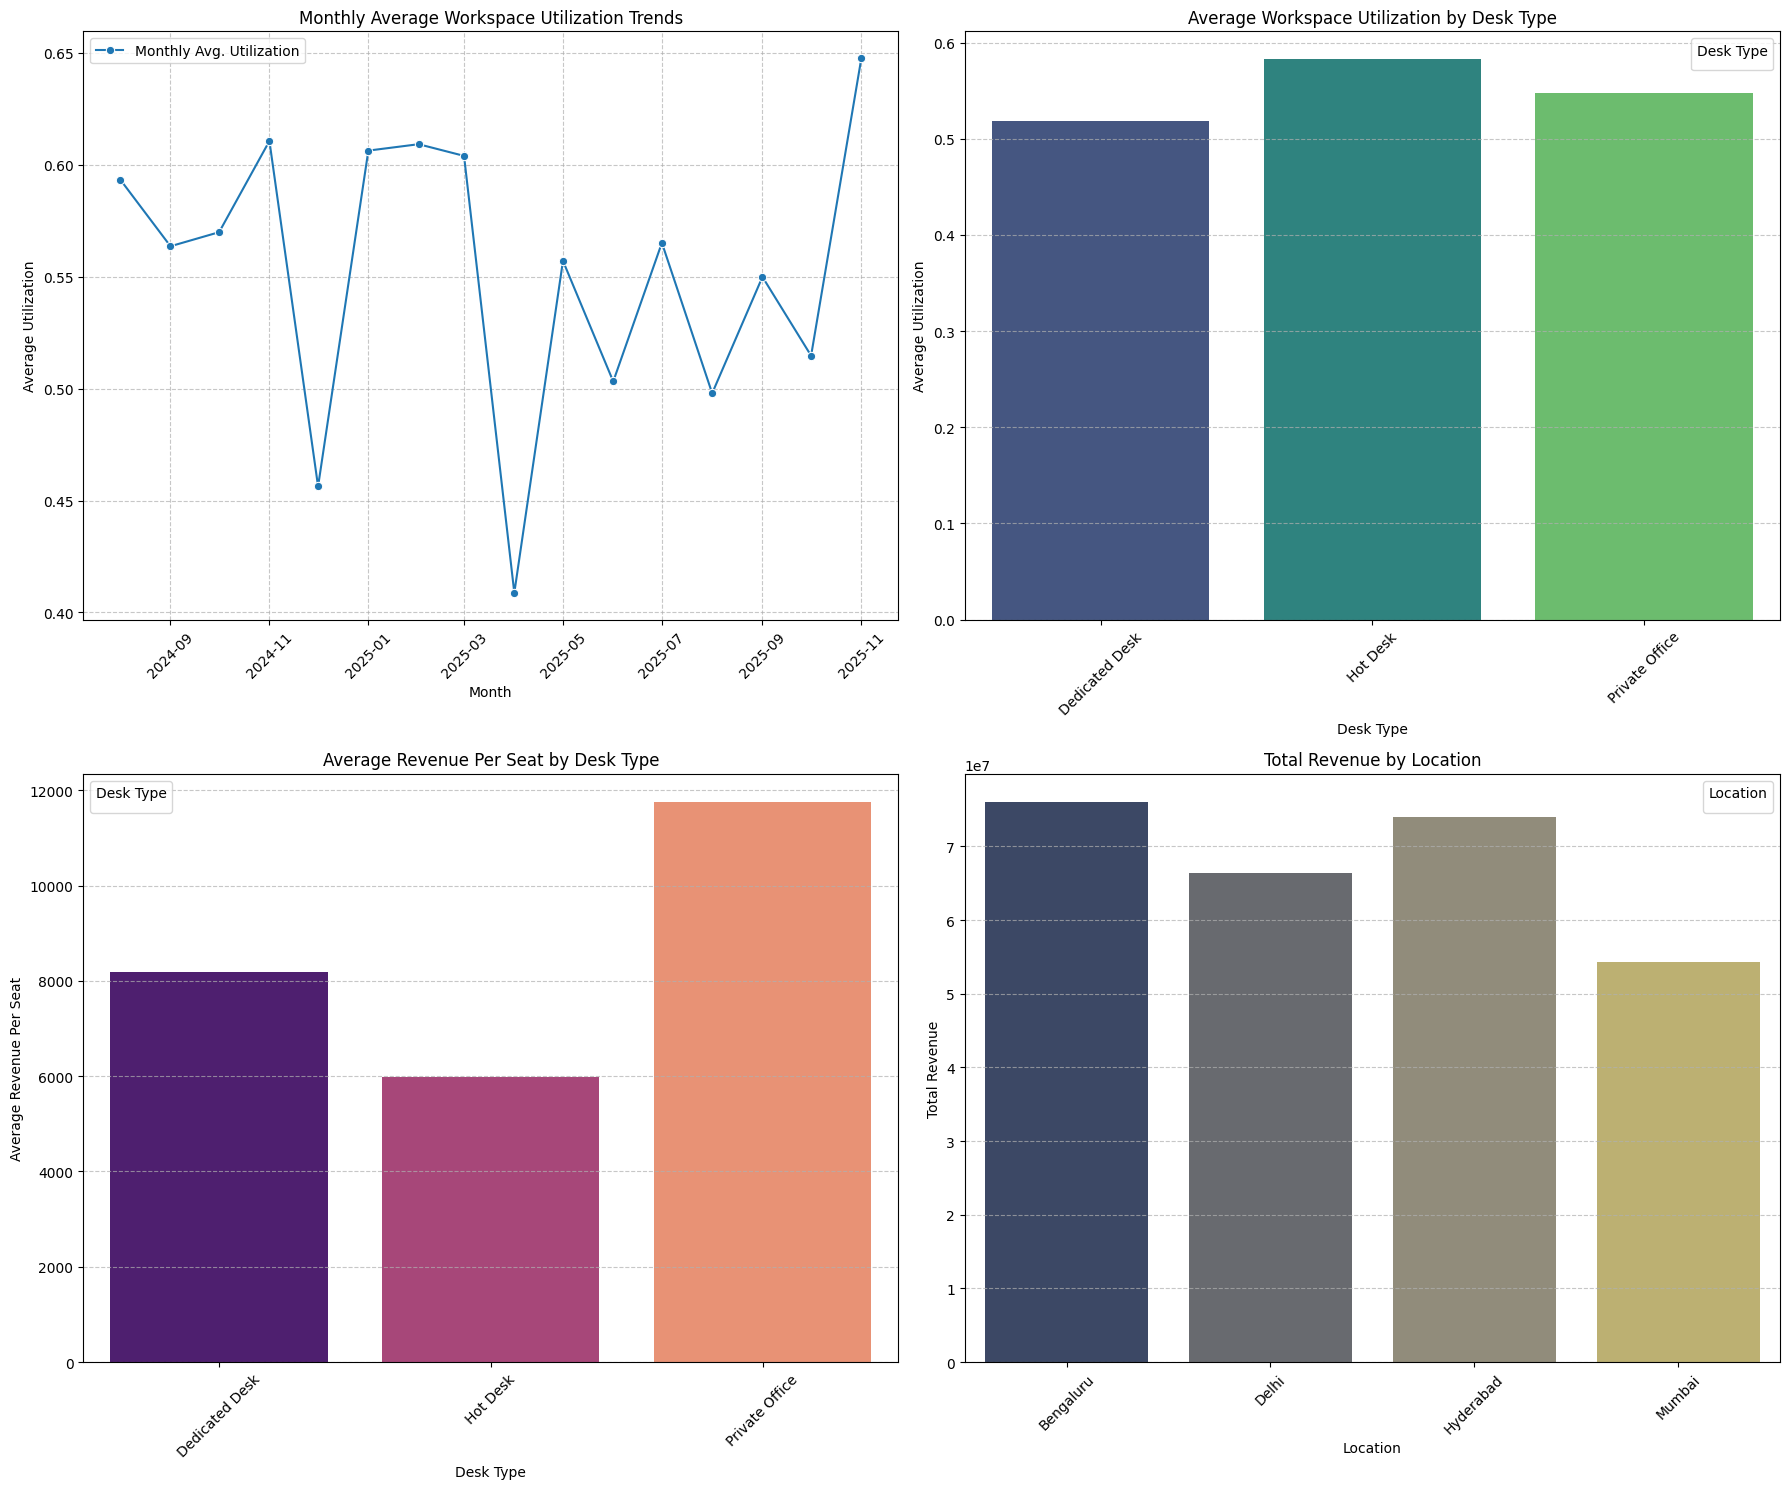

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and subplots
plt.figure(figsize=(18, 15))

# Plot 1: Monthly Average Utilization Trends
plt.subplot(2, 2, 1) # 2 rows, 2 columns, 1st subplot
sns.lineplot(data=df_monthly_util_trends, x='Month_Year', y='Monthly_Avg_Utilization', marker='o', label='Monthly Avg. Utilization')
plt.title('Monthly Average Workspace Utilization Trends')
plt.xlabel('Month')
plt.ylabel('Average Utilization')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Plot 2: Average Utilization by Desk Type
df_avg_util_desk_type = df_avg_util_by_segment.groupby('Desk_Type')['Avg_Utilization'].mean().reset_index()
plt.subplot(2, 2, 2) # 2 rows, 2 columns, 2nd subplot
sns.barplot(data=df_avg_util_desk_type, x='Desk_Type', y='Avg_Utilization', palette='viridis', hue='Desk_Type', dodge=False)
plt.title('Average Workspace Utilization by Desk Type')
plt.xlabel('Desk Type')
plt.ylabel('Average Utilization')
plt.xticks(rotation=45)
plt.legend(title='Desk Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot 3: Average Revenue Per Seat by Desk Type
plt.subplot(2, 2, 3) # 2 rows, 2 columns, 3rd subplot
sns.barplot(data=df_avg_revenue_per_seat_by_desk_type, x='Desk_Type', y='Avg_Revenue_Per_Seat', palette='magma', hue='Desk_Type', dodge=False)
plt.title('Average Revenue Per Seat by Desk Type')
plt.xlabel('Desk Type')
plt.ylabel('Average Revenue Per Seat')
plt.xticks(rotation=45)
plt.legend(title='Desk Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot 4: Total Revenue by Location
df_total_revenue_location = df_total_revenue_by_segment.groupby('Location')['Total_Revenue'].sum().reset_index()
plt.subplot(2, 2, 4) # 2 rows, 2 columns, 4th subplot
sns.barplot(data=df_total_revenue_location, x='Location', y='Total_Revenue', palette='cividis', hue='Location', dodge=False)
plt.title('Total Revenue by Location')
plt.xlabel('Location')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.legend(title='Location')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display plots
plt.tight_layout()
plt.show()


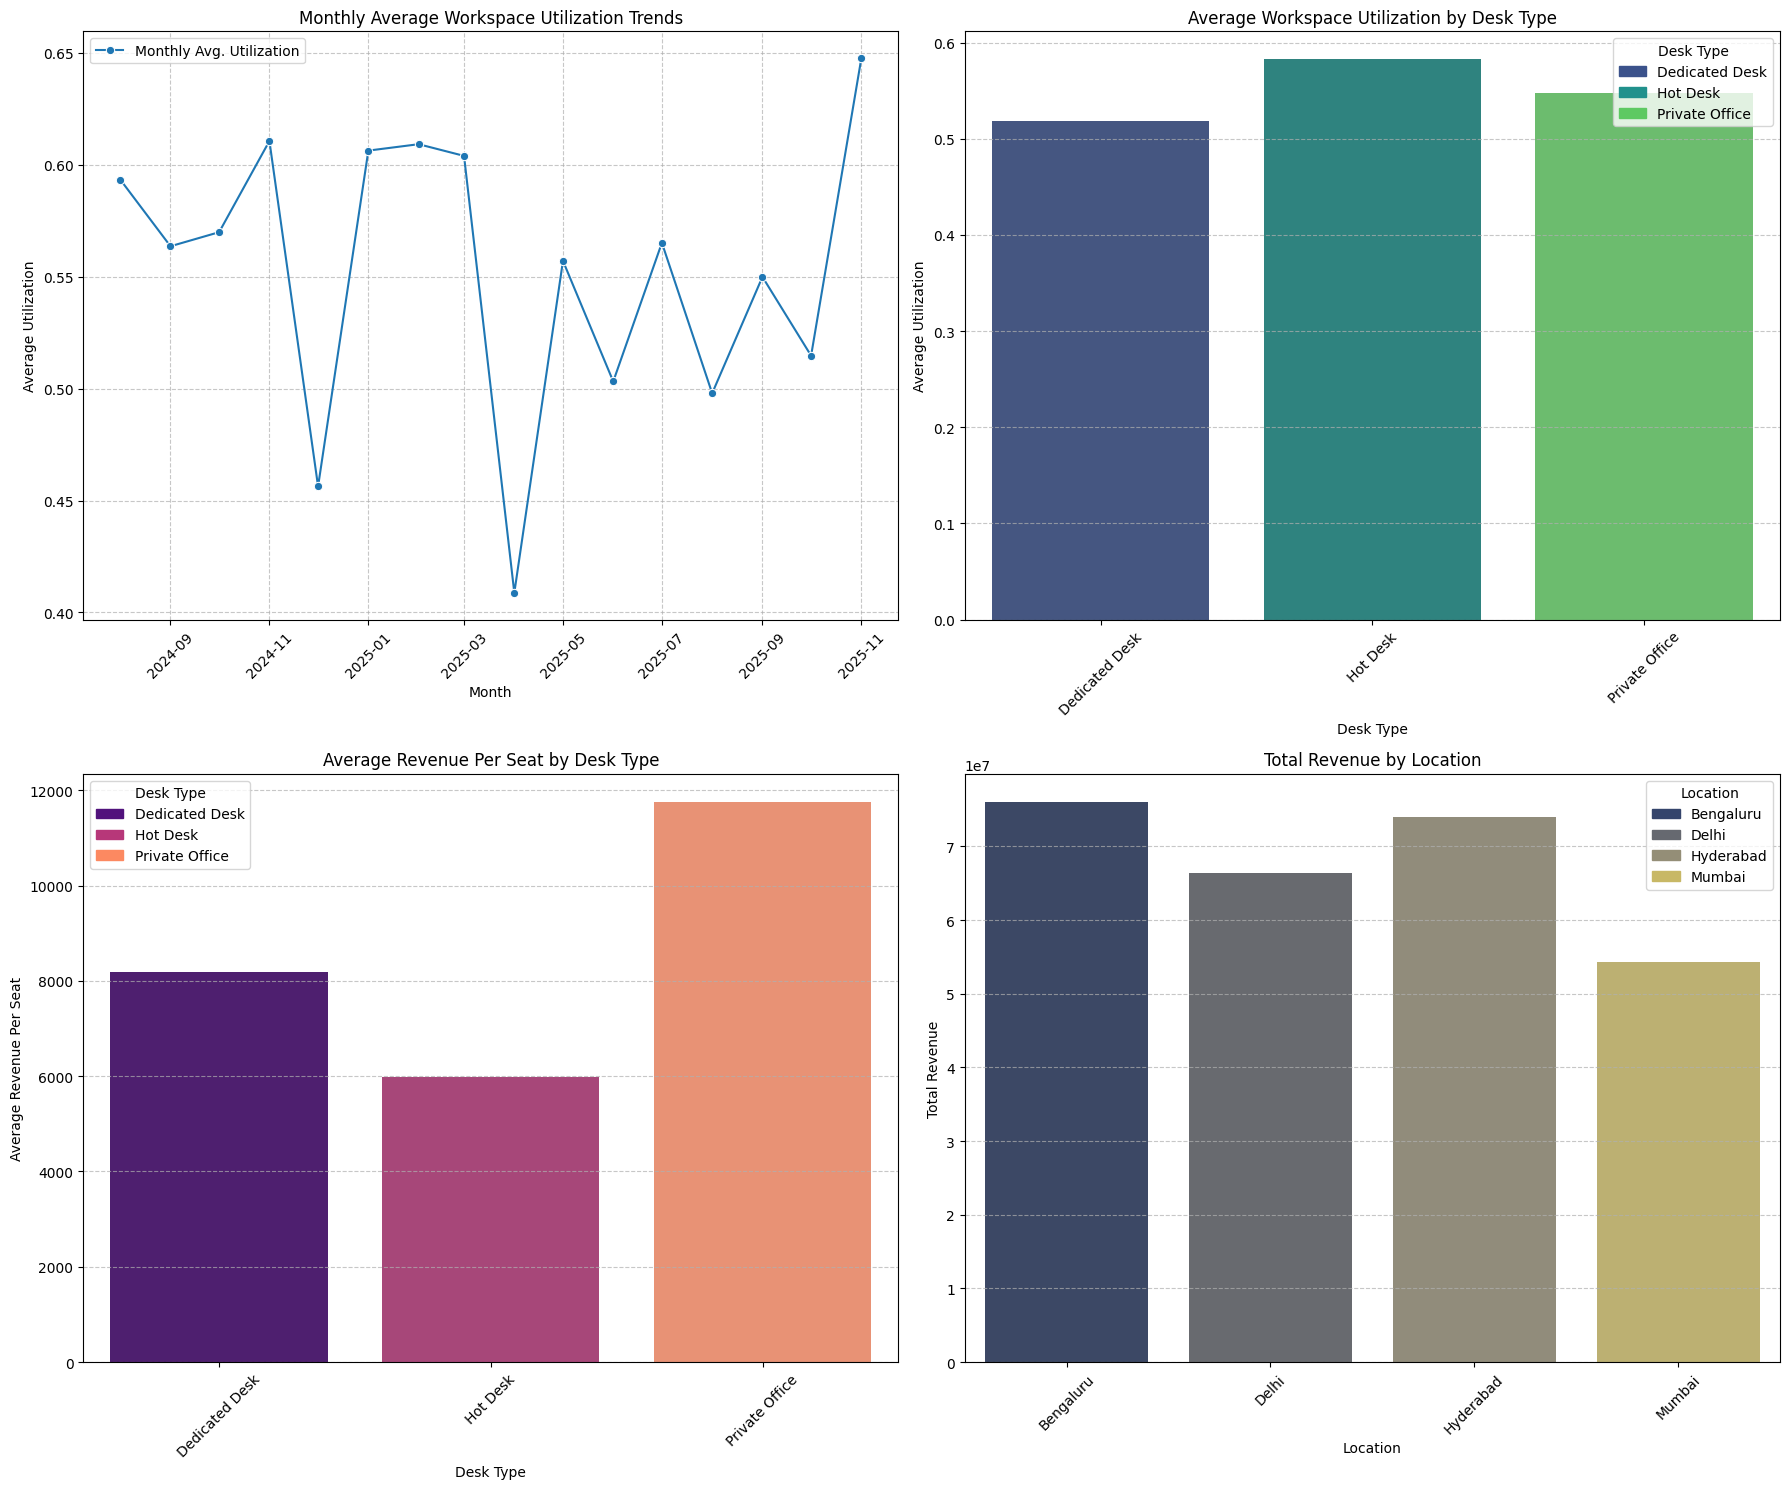

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches # Import mpatches for custom legend handles

# Set up the figure and subplots
plt.figure(figsize=(18, 15))

# Plot 1: Monthly Average Utilization Trends
ax1 = plt.subplot(2, 2, 1) # 2 rows, 2 columns, 1st subplot
sns.lineplot(data=df_monthly_util_trends, x='Month_Year', y='Monthly_Avg_Utilization', marker='o', label='Monthly Avg. Utilization', ax=ax1)
ax1.set_title('Monthly Average Workspace Utilization Trends')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Utilization')
ax1.tick_params(axis='x', rotation=45)
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7);

# Plot 2: Average Utilization by Desk Type
df_avg_util_desk_type = df_avg_util_by_segment.groupby('Desk_Type')['Avg_Utilization'].mean().reset_index()
ax2 = plt.subplot(2, 2, 2) # 2 rows, 2 columns, 2nd subplot
sns.barplot(data=df_avg_util_desk_type, x='Desk_Type', y='Avg_Utilization', palette='viridis', hue='Desk_Type', dodge=False, ax=ax2)
ax2.set_title('Average Workspace Utilization by Desk Type')
ax2.set_xlabel('Desk Type')
ax2.set_ylabel('Average Utilization')
ax2.tick_params(axis='x', rotation=45)
# Create custom legend handles for bar plot 2
desk_type_labels_util = df_avg_util_desk_type['Desk_Type'].unique()
colors_util = sns.color_palette('viridis', n_colors=len(desk_type_labels_util))
patches_util = [mpatches.Patch(color=colors_util[i], label=label) for i, label in enumerate(desk_type_labels_util)]
ax2.legend(handles=patches_util, title='Desk Type')
ax2.grid(axis='y', linestyle='--', alpha=0.7);

# Plot 3: Average Revenue Per Seat by Desk Type
ax3 = plt.subplot(2, 2, 3) # 2 rows, 2 columns, 3rd subplot
sns.barplot(data=df_avg_revenue_per_seat_by_desk_type, x='Desk_Type', y='Avg_Revenue_Per_Seat', palette='magma', hue='Desk_Type', dodge=False, ax=ax3)
ax3.set_title('Average Revenue Per Seat by Desk Type')
ax3.set_xlabel('Desk Type')
ax3.set_ylabel('Average Revenue Per Seat')
ax3.tick_params(axis='x', rotation=45)
# Create custom legend handles for bar plot 3
desk_type_labels_rev = df_avg_revenue_per_seat_by_desk_type['Desk_Type'].unique()
colors_rev = sns.color_palette('magma', n_colors=len(desk_type_labels_rev))
patches_rev = [mpatches.Patch(color=colors_rev[i], label=label) for i, label in enumerate(desk_type_labels_rev)]
ax3.legend(handles=patches_rev, title='Desk Type')
ax3.grid(axis='y', linestyle='--', alpha=0.7);

# Plot 4: Total Revenue by Location
df_total_revenue_location = df_total_revenue_by_segment.groupby('Location')['Total_Revenue'].sum().reset_index()
ax4 = plt.subplot(2, 2, 4) # 2 rows, 2 columns, 4th subplot
sns.barplot(data=df_total_revenue_location, x='Location', y='Total_Revenue', palette='cividis', hue='Location', dodge=False, ax=ax4)
ax4.set_title('Total Revenue by Location')
ax4.set_xlabel('Location')
ax4.set_ylabel('Total Revenue')
ax4.tick_params(axis='x', rotation=45)
# Create custom legend handles for bar plot 4
location_labels = df_total_revenue_location['Location'].unique()
colors_loc = sns.color_palette('cividis', n_colors=len(location_labels))
patches_loc = [mpatches.Patch(color=colors_loc[i], label=label) for i, label in enumerate(location_labels)]
ax4.legend(handles=patches_loc, title='Location')
ax4.grid(axis='y', linestyle='--', alpha=0.7);

# Adjust layout and display plots
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The `wework_workspace_data.csv` file was successfully loaded and transferred to an in-memory SQLite table named `wework_data` for SQL-based analysis.
*   **Workspace Utilization**:
    *   The overall average workspace utilization across all data points was approximately 55.75%.
    *   Utilization varied significantly by segment, with average rates ranging from a low of 22.5% (Hyderabad Hub A Hot Desk) to a high of 79.63% (Delhi Hub B Hot Desk).
    *   Peak utilization reached 100% in at least one instance across the dataset, and for several specific segments (e.g., Delhi Hub A Hot Desk, Mumbai Hub B Private Office).
    *   Monthly average utilization trends showed fluctuations, varying from a low of 40.88% in April 2025 to a high of 64.77% in November 2025.
*   **Revenue Metrics**:
    *   The overall total revenue recorded was \$270,697,117.
    *   The overall average revenue per seat was approximately \$8,672.85.
    *   "Private Office" desk types generated the highest average revenue per seat at \$11,759.90, significantly higher than "Dedicated Desk" (\$8,182.33) and "Hot Desk" (\$5,988.74).
*   **Dashboard Visualizations**: A dashboard was successfully generated with four key plots: Monthly Average Workspace Utilization Trends, Average Workspace Utilization by Desk Type, Average Revenue Per Seat by Desk Type, and Total Revenue by Location. All plots were correctly titled, labeled, and included appropriate legends.

### Insights or Next Steps

*   **Optimize Private Office Offerings**: Given that "Private Offices" yield the highest average revenue per seat, there's a strong opportunity to explore expanding these offerings or enhancing their premium features to capitalize on this high-value segment.
*   **Address Utilization Gaps**: The significant variance in utilization across different locations, buildings, and desk types suggests an opportunity to investigate factors contributing to low utilization (e.g., marketing, pricing, amenities) in underperforming segments and implement targeted strategies for improvement.


In [23]:
df_wework.to_csv("wework_workspace_data.csv", index=False)


In [24]:
from google.colab import files
files.download("wework_workspace_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>